In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text
from matplotlib.patches import Ellipse, Polygon
from matplotlib import rc
rc('text', usetex=False)

In [3]:
def get_roy(yr, lg, verbose=False):
    verbose and print(yr,lg)
    url = f"https://widgets.sports-reference.com/wg.fcgi?css=1&site=br&url=%2Fawards%2Fawards_{yr}.shtml&div=div_{lg}_ROY_voting"
    df = pd.read_html(url)[0]
    df.columns = df.columns.droplevel(0)
    df["year"] = yr
    df["lg"] = lg
    return df

In [13]:
%%time
all_roy = pd.concat([
    get_roy(yr,lg)
    for yr in range(1980, 2020)
    for lg in ["AL", "NL"]
])

CPU times: user 2.15 s, sys: 29.1 ms, total: 2.18 s
Wall time: 23 s


In [156]:
all_roy["vote_diff"] = all_roy.groupby("year")["Vote Pts"].diff() * -1
all_roy["war_diff"] = all_roy.groupby("year")["WAR"].diff()
all_roy["roy"] = all_roy.apply(lambda x: all_roy.loc[0].query(f"year == {x.year} and lg == '{x.lg}'")["Name"], axis=1)

In [157]:
all_roy.head()

,Rank,Name,Tm,Vote Pts,1st Place,Share,WAR,G,AB,R,H,HR,RBI,SB,BB,BA,OBP,SLG,OPS,W,L,ERA,WHIP,G,GS,SV,IP,H,HR,BB,SO,year,lg,vote_diff,war_diff,roy
0,1,Joe Charboneau,CLE,102.000,15.000,73%,2.400,131,453,76,131,23,87,2,49,0.289,0.358,0.488,0.846,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1980,AL,nan,nan,Joe Charboneau
1,2,Dave Stapleton,BOS,40.000,3.000,29%,3.000,106,449,61,144,7,45,3,13,0.321,0.338,0.463,0.802,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1980,AL,62.000,0.600,Joe Charboneau
2,3,Doug Corbett,MIN,38.000,3.000,27%,5.700,0,0,0,0,0,0,0,0,nan,nan,nan,nan,8.000,6.000,1.980,1.056,73.000,0.000,23.000,136.100,102.000,7.000,42.000,89.000,1980,AL,2.000,2.700,Joe Charboneau
3,4,Damaso Garcia,TOR,35.000,3.000,25%,1.300,140,543,50,151,4,46,13,12,0.278,0.296,0.381,0.677,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1980,AL,3.000,-4.400,Joe Charboneau
4,5,Britt Burns,CHW,33.000,4.000,24%,7.000,0,0,0,0,0,0,0,0,nan,nan,nan,nan,15.000,13.000,2.840,1.160,34.000,32.000,0.000,238.000,213.000,17.000,63.000,133.000,1980,AL,2.000,5.700,Joe Charboneau


In [158]:
roy_seconds = all_roy.loc[1,["Name", "war_diff", "vote_diff","year","lg","roy"]]

In [159]:
plt.xkcd()

In [160]:
df = roy_seconds
jobbed = df.query("war_diff > 4")
shoulda_won = df.query("war_diff > 1.5 and war_diff < 4")
shoulda_close = df.query("war_diff > -2 and war_diff < 0 and vote_diff > 100")
unfair_comp = df.query("war_diff < -4 and vote_diff > 6")

In [183]:
legend_df = pd.concat([unfair_comp,shoulda_close,shoulda_won,jobbed])

In [184]:
(legend_df.Name.map(str) + " '" + legend_df.year.astype(str).str.slice(2)).tolist()

["Mark Grace '88",
 "Greg McMichael '93",
 "Jose Cruz '97",
 "CC Sabathia '01",
 "Yoenis CÃ©spedes '12",
 "Andrew Benintendi '17",
 "John Hudek '94",
 "Trea Turner '16",
 "Bill Gullickson '80",
 "Craig McMurtry '83",
 "Tom Browning '85",
 "Kenny Lofton '92",
 "Moises Alou '92",
 "Edgar Renteria '96",
 "Rolando Arrojo '98",
 "J.A. Happ '09",
 "Austin Jackson '10",
 "Jason Heyward '10",
 "Troy Tulowitzki '07"]

In [185]:
cell_text=legend_df[["Name","roy"]].values

In [195]:
cell_text[-1] = np.array(['Troy Tulowitzki', 'Ryan Braun\n*but really COORS'])

In [189]:
cell_text

array([['Mark Grace', 'Chris Sabo'],
       ['Greg McMichael', 'Mike Piazza'],
       ['Jose Cruz', 'Nomar Garciaparra'],
       ['CC Sabathia', 'Ichiro Suzuki'],
       ['Yoenis CÃ©spedes', 'Mike Trout'],
       ['Andrew Benintendi', 'Aaron Judge'],
       ['John Hudek', 'Raul Mondesi'],
       ['Trea Turner', 'Corey Seager'],
       ['Bill Gullickson', 'Steve Howe'],
       ['Craig McMurtry', 'Darryl Strawberry'],
       ['Tom Browning', 'Vince Coleman'],
       ['Kenny Lofton', 'Pat Listach'],
       ['Moises Alou', 'Eric Karros'],
       ['Edgar Renteria', 'Todd Hollandsworth'],
       ['Rolando Arrojo', 'Ben Grieve'],
       ['J.A. Happ', 'Chris Coghlan'],
       ['Austin Jackson', 'Neftali Feliz'],
       ['Jason Heyward', 'Buster Posey'],
       ['Troy Tulowitzki', 'Ryan Braun\n but really COORS']], dtype=object)

In [123]:
def annotate_plrs(df, ax):
    return [
    ax.annotate(plr.Name + " '" + str(plr.year)[2:],
                (plr.war_diff, plr.vote_diff),
                xytext = (10,5),
                textcoords="offset pixels",
                size=12,
                arrowprops=dict(
                    arrowstyle="-|>"
                )
               )
    for plr in df.itertuples()
]

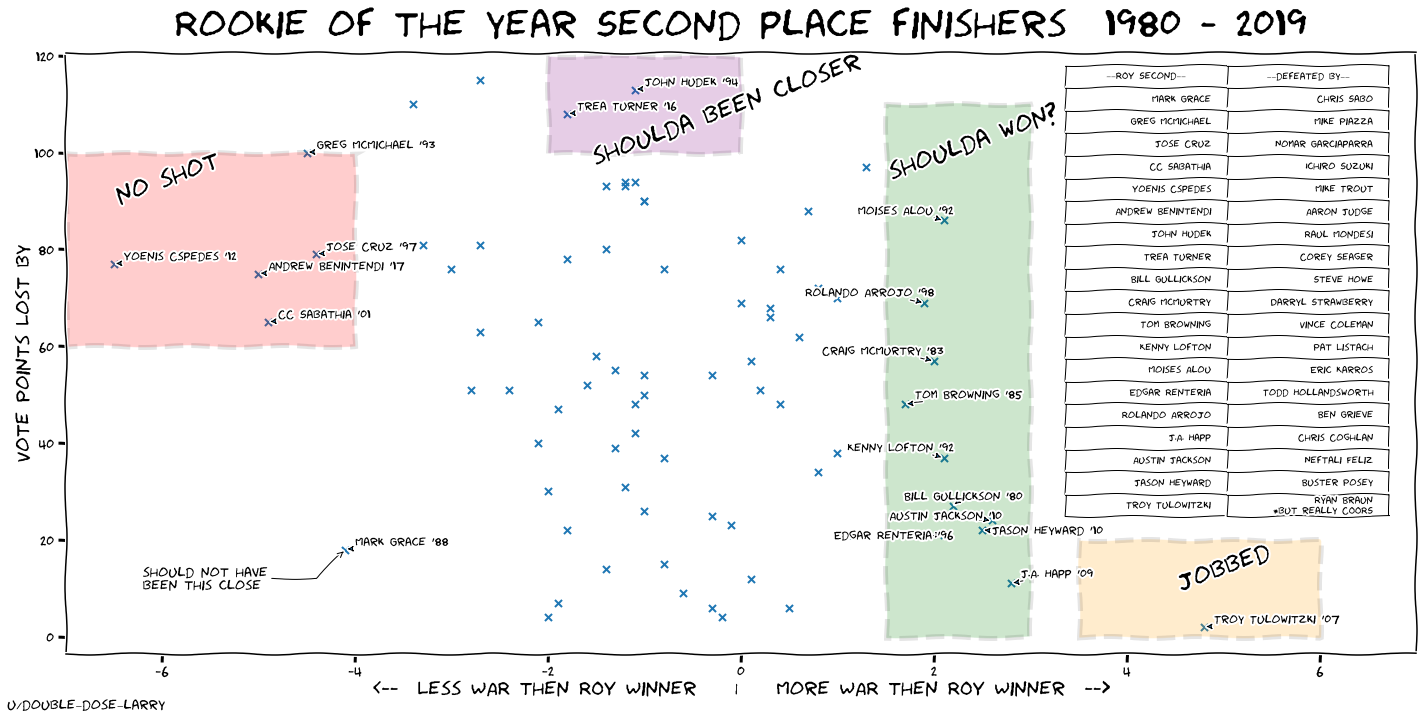

In [225]:
ax = df.plot(
    kind="scatter",
    y="vote_diff",
    x="war_diff",
    figsize=(20,10),
    xlim=(-7,7),
    marker="x",
    s=50
)

sz=25


# jobbed section
ax.add_patch(Polygon(
    [[3.5,0],[3.5,20],[6,20],[6,0]],
    fc="orange",
    ls="--",
    lw=5,
    ec="k",
    alpha=0.1
))
ax.annotate(r"jobbed", (4.5,10), size=sz, rotation=20)
jobbed_ann = annotate_plrs(jobbed,ax)

# shoulda won
ax.add_patch(Polygon(
    [[1.5,0],[1.5,110],[3,110],[3,0]],
    fc="green",
    ls="--",
    lw=5,
    ec="k",
    alpha=0.1
))
ax.annotate("shoulda won?", (1.5,95), size=sz, rotation=20)
shoulda_won_ann = annotate_plrs(shoulda_won,ax)


# shoulda been closer
ax.add_patch(Polygon(
    [[-2,100],[-2,120],[0,120],[0,100]],
    fc="purple",
    ls="--",
    lw=5,
    ec="k",
    alpha=0.1
))
ax.annotate("shoulda been closer", (-1.57,98), size=sz, rotation=20)
shoulda_close_ann = annotate_plrs(shoulda_close,ax)


# unfair competition
ax.add_patch(Polygon(
    [[-7,60],[-7,100],[-4,100],[-4,60]],
    fc="red",
    ls="--",
    lw=5,
    ec="k",
    alpha=0.1
))
ax.annotate("no shot", (-6.5,90), size=sz, rotation=20)
unfair_comp_ann = annotate_plrs(unfair_comp,ax)

# should not have been this close
ax.annotate("should not have\nbeen this close",
            (-4.1, 18),
            xytext=(-6.2,10),
            arrowprops=dict(
                arrowstyle="->",
                connectionstyle="angle,angleA=0,angleB=45"
            )
           )

# add table
table = plt.table(cellText=cell_text,
                      colLabels=["__ROY Second__", "__defeated by__"],
                      colWidths=[.12,.12],
                      fontsize=17,
                      colLoc="center",
                      loc='upper right')
table.scale(1,1.7)

plt.ylabel("Vote Points Lost by", size=20)
plt.xlabel("<--  Less WAR then ROY Winner    |    More WAR then ROY Winner  -->", size=20)

adjust_text(shoulda_won_ann, lim=20,add_objects=[table])
plt.title("Rookie of the year Second place finishers  1980 - 2019", pad=20, size=39)
plt.tight_layout()
plt.figtext(0.005,.005,"u/double_dose_larry")
plt.savefig("roy_seconds.jpg")